# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [34]:
# Checking the number of mice.
# Display the number of unique mice IDs
unique_mice = mouse_study_df['Mouse ID'].nunique()
unique_mice

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Check for any mouse ID with duplicate time points.
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [38]:
# Checking the number of mice in the clean DataFrame.
mouse_study = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
updated_unique_mice = mouse_study['Mouse ID'].nunique()
updated_unique_mice

248

## Summary Statistics

In [39]:
tumor_df = mouse_study.set_index('Drug Regimen')
tumor_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_stats = pd.DataFrame({
     'Mean Tumor Volume': tumor_mean,
     'Median Tumor Volume': tumor_median,
     'Tumor Volume Variance': tumor_var,
     'Tumor Volume Std. Dev.': tumor_std,
     'Tumor Volume Std. Err.': tumor_sem})
tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_stats_agg = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_agg_title = "Tumor Volume (mm3)"
print(tumor_stats_agg_title)
tumor_stats_agg

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

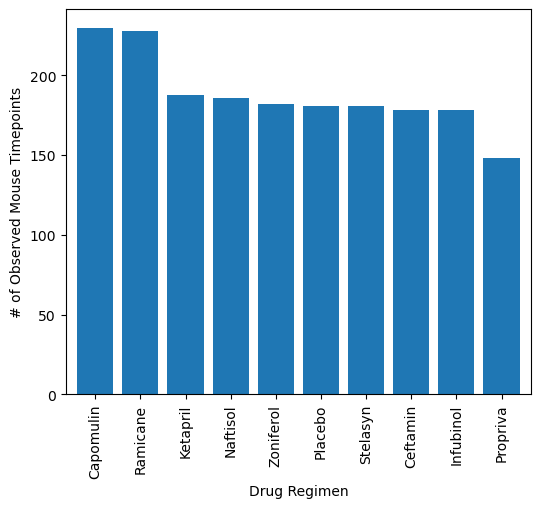

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = mouse_study.groupby('Drug Regimen').size()
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

# Plot a bar graph using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(6, 5), width=0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

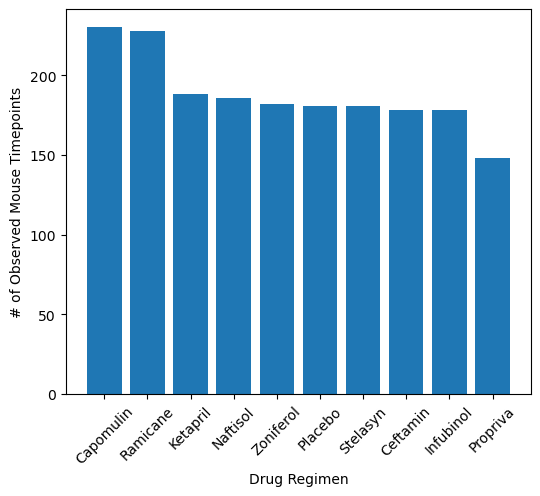

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = mouse_study.groupby('Drug Regimen').size()
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

# Extracting the data for plotting
drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Create a bar graph using Matplotlib's PyPlot
plt.figure(figsize=(6, 5))
plt.bar(drug_regimens, counts, width=0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

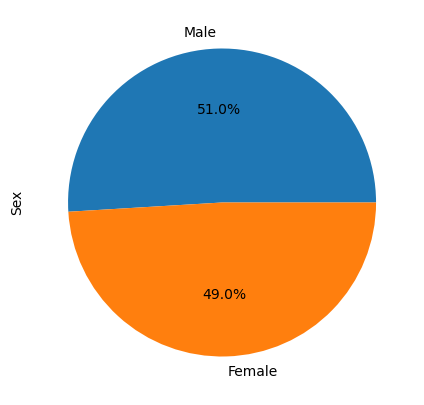

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_study['Sex'].value_counts()

# Plot a pie chart using Pandas
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(5, 5))
plt.ylabel('Sex')
plt.show()

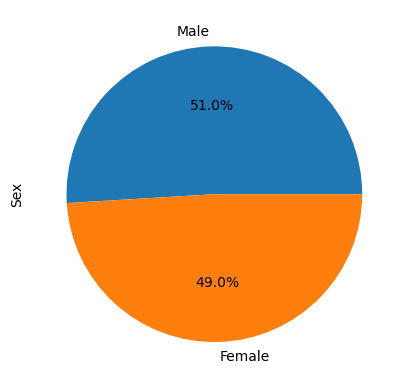

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = mouse_study[mouse_study['Drug Regimen'].isin(drugs)]
max_timepoints = filtered_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

final_tumor_vol = filtered_df.merge(max_timepoints, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='inner')

In [47]:
# Put treatments into a list for the for loop (and later for plot labels)
drug_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each drug regimen
tumor_vol_data = []

for drug in drug_treatments:
    # Filter the data for the current drug regimen
    drug_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == drug]
    # Append the tumor volume data for the current drug regimen
    tumor_vol_data.append(drug_data['Tumor Volume (mm3)'])
    
    # Calculate quartiles and IQR for the current drug regimen
    quartile1 = drug_data['Tumor Volume (mm3)'].quantile(0.25)
    quartile3 = drug_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = quartile3 - quartile1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = quartile1 - 1.5 * IQR
    upper_bound = quartile3 + 1.5 * IQR
    
    # Determine outliers for the current drug regimen
    outliers = drug_data[(drug_data['Tumor Volume (mm3)'] < lower_bound) | (drug_data['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)']
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


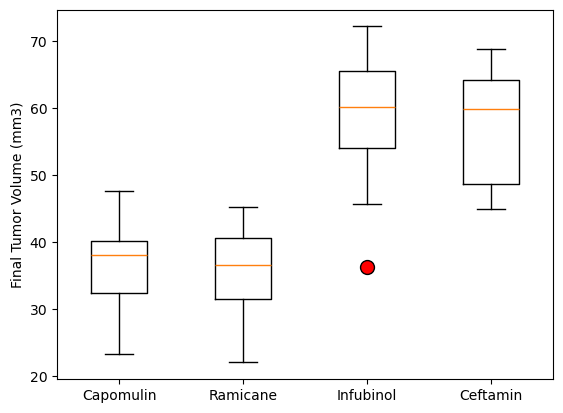

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Extract the drug regimens and tumor volume data
boxplot = plt.boxplot(tumor_vol_data, labels=drug_treatments, showfliers=True)
for flier in boxplot['fliers']:
    flier.set_markersize(10)
    flier.set_markerfacecolor('red')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

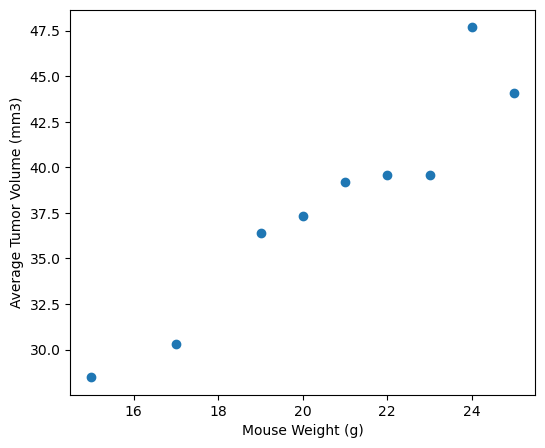

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate the average tumor volume for each weight value
capomulin_weight = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 5))
plt.scatter(capomulin_weight.index, capomulin_weight, label='Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.7686134812139006


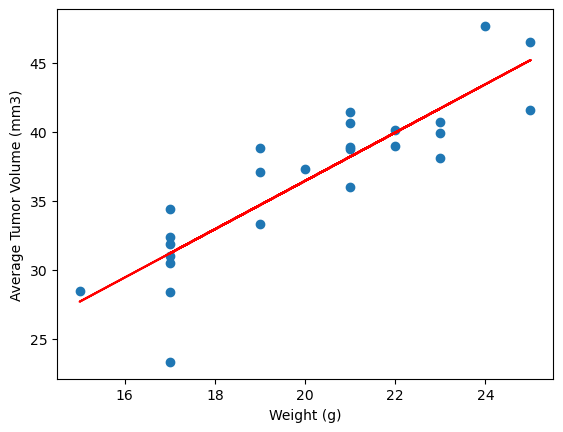

In [50]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == 'Capomulin']
x_values = capomulin_data['Weight (g)']
y_values = capomulin_data['Tumor Volume (mm3)']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")

plt.show()